In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
algorithms = ['QMIX', 'VDN']
test_types = ['HinderOneAll', 'HinderOneGivenPeriod']
agents = ['influent_flowrate', '1st_stage_pump', '2nd_stage_pump']
agents_hue = {
    'influent_flowrate': 'C3', '1st_stage_pump': 'C4', '2nd_stage_pump':'C8'
}

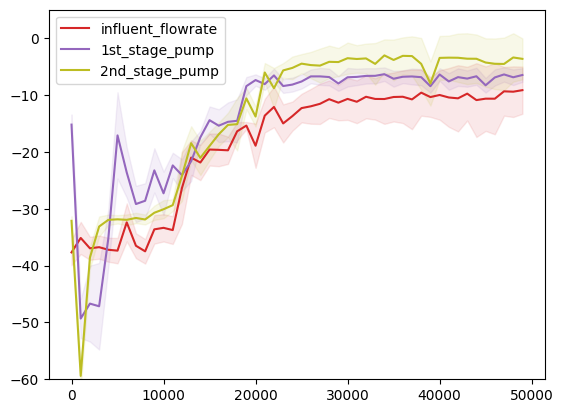

FileNotFoundError: [Errno 2] No such file or directory: 'VDN/HinderOneAll'

In [3]:
test = test_types[0]
# algorithm = algorithms[1]
plt.style.use('default')
raw_dfs = {}
summary_dfs = {}
for algorithm in algorithms:
    raw_dfs[algorithm] = pd.DataFrame()
    data_path = os.path.join(algorithm, test)
    datas = os.listdir(data_path)
    datas = sorted(datas)
    reward_mean_log = []
    reward_std_log  = []
    episode_num_log = []
    agent_log       = []

    for i, data in enumerate(datas):
        data_parsed = data.split('_')
        # episode = int(data_parsed[0])
        data_df = pd.read_csv(os.path.join(data_path, data))

        episode = data_df['episode number'][0]
        # agent   = data_df['agent_hindered'][0]
        agent   = '_'.join(data_parsed[1:-1])
        data_df['agent_hindered'] = agent
        if i == 0:
            raw_dfs[algorithm] = data_df
        else:
            raw_dfs[algorithm] = pd.concat([raw_dfs[algorithm], data_df])
        
        reward_mean_log.append(np.mean(data_df['Reward sum']))
        reward_std_log.append(np.std(data_df['Reward sum']))
        episode_num_log.append(episode)
        agent_log.append(agent)
        
    summary_df = pd.DataFrame(
        {
            "episode": episode_num_log,
            "agent hindered": agent_log,
            "Mean reward":reward_mean_log,
            "Std reward": reward_std_log,
        }
    )
    summary_df = summary_df.sort_values(by='episode', ignore_index=True)
    summary_dfs[algorithm] = summary_df

    raw_dfs[algorithm] = raw_dfs[algorithm].sort_values(by='episode number', ignore_index=True)
    for a in agents:
        episodes    = np.array(summary_df[summary_df['agent hindered']==a]['episode'])
        mean_reward = np.array(summary_df[summary_df['agent hindered']==a]['Mean reward'])
        std_reward  = np.array(summary_df[summary_df['agent hindered']==a]['Std reward'])
        plt.plot(episodes, mean_reward, agents_hue[a], label=a)
        plt.ylim([-60.0, 5.0])
        plt.fill_between(x=episodes, y1=mean_reward-std_reward, y2=mean_reward+std_reward, color=agents_hue[a], alpha=0.1)

    plt.legend()
    plt.show()

In [16]:
episode_range = (summary_dfs['QMIX']['episode'] < 5000) & (summary_dfs['QMIX']['episode'] > 0)
summary_dfs['QMIX'][(summary_dfs['QMIX']['agent hindered']=='influent_flowrate') & (episode_range)]

,episode,agent hindered,Mean reward,Std reward
5,1000,influent_flowrate,-35.142050,2.825204
8,2000,influent_flowrate,-36.966978,2.026341
10,3000,influent_flowrate,-36.767058,2.036136
13,4000,influent_flowrate,-37.222760,2.102861


In [33]:
violinplot_lower_ranges = np.arange(0, 49000, 10000)
violinplot_upper_ranges = violinplot_lower_ranges + 10000

episode_conditions = {}

for algorithm in algorithms:
    episode_conditions[algorithm] = [(raw_dfs[algorithm]['episode number'] >= violinplot_lower_ranges[i]) & (raw_dfs[algorithm]['episode number'] <= violinplot_upper_ranges[i]) for i,_ in enumerate(violinplot_lower_ranges)]

In [43]:
raw_dfs['QMIX'][episode_conditions['QMIX'][0]]

,Unnamed: 0,episode number,Reward sum,mean concentration,agent_hindered,hinder_type,converged
0,12,0,-32.463379,523.799321,2nd_stage_pump,HinderOneAll,True
1,13,0,-32.577060,594.904745,2nd_stage_pump,HinderOneAll,True
2,14,0,-32.769535,606.927044,2nd_stage_pump,HinderOneAll,True
3,15,0,-32.922331,637.806533,2nd_stage_pump,HinderOneAll,True
4,16,0,-33.044305,643.599184,2nd_stage_pump,HinderOneAll,True
...,...,...,...,...,...,...,...
655,11,10000,-28.401337,540.388700,1st_stage_pump,HinderOneAll,True
656,12,10000,-29.060013,586.231053,1st_stage_pump,HinderOneAll,True
657,13,10000,-29.642626,532.909008,1st_stage_pump,HinderOneAll,True
658,14,10000,-30.212700,580.995244,1st_stage_pump,HinderOneAll,True


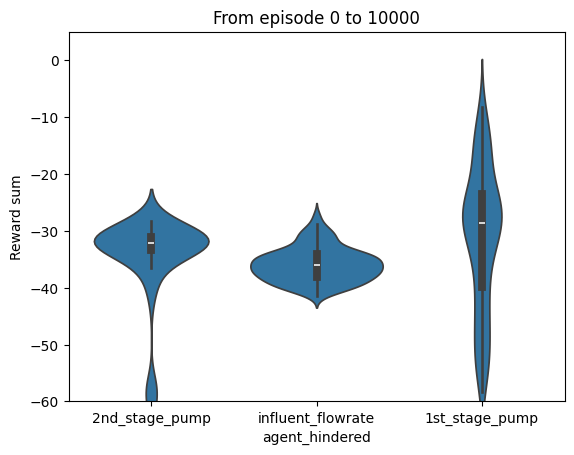

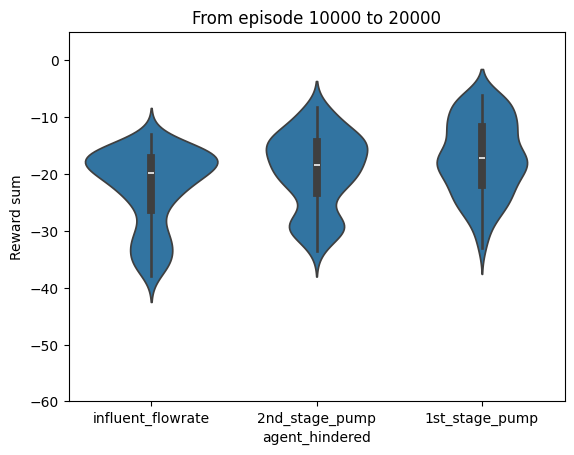

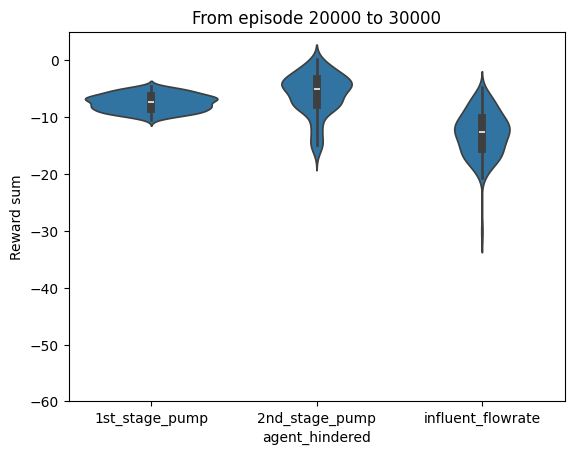

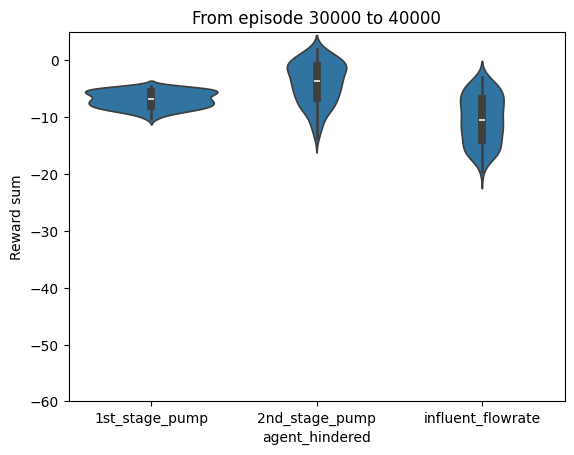

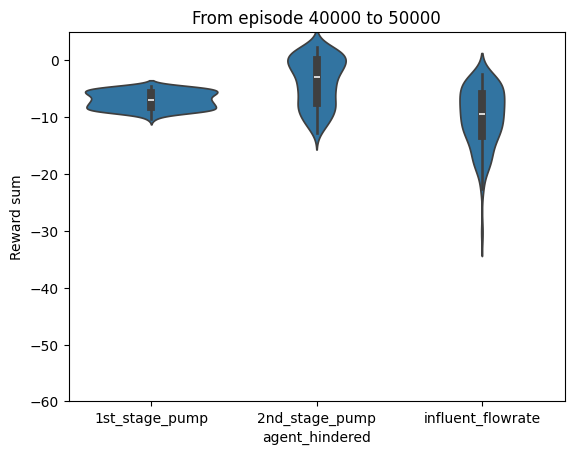

In [50]:
for i, episode_condition in enumerate(episode_conditions['QMIX']):
    violinplot_data = raw_dfs['QMIX'][episode_condition]
    sns.violinplot(violinplot_data, y='Reward sum', x='agent_hindered')
    plt.title(f"From episode {violinplot_lower_ranges[i]} to {violinplot_upper_ranges[i]}")
    plt.ylim([-60.0, 5.0])
    plt.show()

In [28]:
np.arange(0, 49000, 10000)

array([    0, 10000, 20000, 30000, 40000])

In [ ]:
test = test_types[0]

for algorithm in algorithms:
    data_path = os.path.join(algorithm, test)
    